In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [3]:
df_year=pd.read_csv('../data/year_nowon.csv')
df_year=df_year.dropna()
df_year.head()

,주소,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,전월세(만원),...,브랜드,주차관제,승강기,복도유형,난방방식,단지명(K-apt),일반관리,경비관리,청소관리,임대차3법
1,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,84.88,202002,8,35000,...,0,0.0,5.0,0.0,1.0,공릉건영장미,3.0,2.0,2.0,0
2,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,84.88,202007,1,40000,...,0,0.0,5.0,0.0,1.0,공릉건영장미,3.0,2.0,2.0,0
3,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,59.87,202007,11,27000,...,0,0.0,5.0,0.0,1.0,공릉건영장미,3.0,2.0,2.0,0
4,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,59.87,202007,13,28000,...,0,0.0,5.0,0.0,1.0,공릉건영장미,3.0,2.0,2.0,0
5,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,84.88,202008,17,40000,...,0,0.0,5.0,0.0,1.0,공릉건영장미,3.0,2.0,2.0,1


In [4]:
print(df_year.columns)

Index(['주소', '번지', '본번', '부번', '단지명', '전월세구분', '전용면적(㎡)', '계약년월', '계약일',
       '전월세(만원)', '층', '세대수', '건축년도', '도로명', '위도', '경도', '초등학교', '병원', '공원',
       '대형마트', '백화점', 'cctv', '주차대수', '브랜드', '주차관제', '승강기', '복도유형', '난방방식',
       '단지명(K-apt)', '일반관리', '경비관리', '청소관리', '임대차3법'],
      dtype='object')


In [5]:
# correlation
var=['전용면적(㎡)','층','세대수','건축년도','초등학교','병원','공원','대형마트','백화점','cctv','주차대수','브랜드','주차관제','승강기','난방방식','복도유형','일반관리','경비관리','청소관리','임대차3법']

for i in range(len(var)):
    corr=np.corrcoef(df_year[var[i]],df_year['전월세(만원)'])[0,1]
    print(var[i],':',corr)

전용면적(㎡) : 0.8378513631961447
층 : 0.10243232979377118
세대수 : -0.36978832901384456
건축년도 : 0.4039084373650304
초등학교 : 0.09788201802771304
병원 : -0.03779914817905423
공원 : 0.16327184924446392
대형마트 : -0.10179814548373646
백화점 : 0.16225158426995318
cctv : 0.13433571477131823
주차대수 : -0.0010512628319403348
브랜드 : 0.22591138224396895
주차관제 : 0.17114972062584372
승강기 : 0.012109954519216856
난방방식 : 0.32890237549120366
복도유형 : -0.4399299238601535
일반관리 : -0.33036875527244086
경비관리 : -0.3416415965263703
청소관리 : -0.23174050454234318
임대차3법 : 0.13739972047821178


In [6]:
lm_df=df_year
lm_df['대형마트'] = np.log(lm_df['대형마트'])
lm_df['주차대수'] = np.log(lm_df['주차대수'])
lm_df['전월세(만원)'] = np.log(lm_df['전월세(만원)'])

In [7]:
att=['전용면적(㎡)','건축년도','세대수','층','초등학교','병원','대형마트','주차대수','브랜드','주차관제','승강기','복도유형','경비관리','임대차3법']
x1=lm_df[att]
y1=lm_df['전월세(만원)']

In [8]:
# OLS Regression
x2 = sm.add_constant(x1, has_constant = "add")
multi_model=sm.OLS(y1,x2)
fitted=multi_model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전월세(만원)   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1850.
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:48:46   Log-Likelihood:                 190.76
No. Observations:                8811   AIC:                            -351.5
Df Residuals:                    8796   BIC:                            -245.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.7662      1.225    -12.053      0.000     -17.168     -12.365
전용면적(㎡)        0.0153      0.000    101.644      0.000       0.015       0.016
건축년도           0.0118      0.001     19.120      0.000       0.011       0.013
세대수           -0.0001   8.01e-06    -14.515      0.000      -0.000      -0.000
층              0.0033      0.001      6.259      0.000       0.002       0.004
초등학교           0.0642      0.020      3.146      0.002       0.024       0.104
병원            -0.0383      0.004    -10.042      0.000      -0.046      -0.031
대형마트          -0.0811      0.006    -13.749      0.000      -0.093      -0.070
주차대수           0.0578      0.009      6.767      0.000       0.041       0.075
브랜드            0.0725      0.019      3.834      0.000       0.035       0.110
주차관제          -0.1650      0.010    -15.934      0.000      -0.185      -0.145
승강기            0.0040      0.000      9.536      0.000       0.003       0.005
복도유형          -0.0830      0.006    -12.929      0.000      -0.096      -0.070
경비관리           0.0026      0.000      6.143      0.000       0.002       0.003
임대차3법          0.1281      0.005     24.419      0.000       0.118       0.138
==============================================================================
Omnibus:                     5660.075   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163075.567
Skew:                          -2.625   Prob(JB):                         0.00
Kurtosis:                      23.411   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# VIF
pd.DataFrame({'column': column, 'VIF': variance_inflation_factor(multi_model.exog, i)} 
             for i, column in enumerate(multi_model.exog_names)
             if column != 'Intercept')

,column,VIF
0,const,235453.093772
1,전용면적(㎡),1.589220
2,건축년도,2.732063
3,세대수,9.706348
4,층,1.032891
5,초등학교,1.223549
6,병원,1.692356
7,대형마트,1.759048
8,주차대수,5.830536
9,브랜드,1.324527


In [10]:
# Linear Regression
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.7, test_size=0.3)

y1_train=np.array(y1_train).ravel()
y1_test=np.array(y1_test).ravel()

print('Training Features Shape:', x1_train.shape)
print('Training Labels Shape:', y1_train.shape)
print('Testing Features Shape:', x1_test.shape)
print('Testing Labels Shape:', y1_test.shape)

Training Features Shape: (6167, 14)
Training Labels Shape: (6167,)
Testing Features Shape: (2644, 14)
Testing Labels Shape: (2644,)


<function matplotlib.pyplot.show(close=None, block=None)>

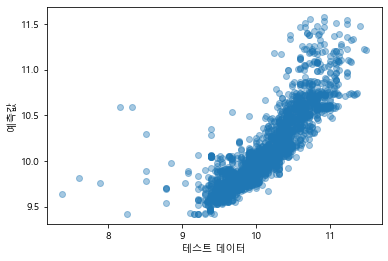

In [11]:
mlr=LinearRegression()
mlr.fit(x1_train,y1_train)
y1_predict=mlr.predict(x1_test)
plt.scatter(y1_test,y1_predict,alpha=0.4)
plt.xlabel('테스트 데이터')
plt.ylabel('예측값')
plt.show

In [12]:
print(mlr.score(x1_train,y1_train))

0.7478933233607485


In [13]:
# Random Forest Regressor
att=['전용면적(㎡)','건축년도','세대수','층','초등학교','병원','대형마트','주차대수','브랜드','주차관제','승강기','복도유형','경비관리','임대차3법']

rf_x1=df_year[att]
rf_y1=df_year[['전월세(만원)']]
x2_train, x2_test, y2_train, y2_test = train_test_split(rf_x1, rf_y1, train_size=0.8, test_size=0.2)

y2_train=np.array(y2_train).ravel()
y2_test=np.array(y2_test).ravel()

In [18]:
# GridSearchCV
params = { 'n_estimators' : [500,1000],
           'max_depth' : [6,8,10],
           'min_samples_leaf' : [4,6,8],
           'min_samples_split' : [2, 4, 6]
            }


rf_model = RandomForestRegressor(random_state = 0, n_jobs = -1)
grid_search = GridSearchCV(rf_model, param_grid = params, cv = 3, n_jobs = -1)
grid_search.fit(x2_train, y2_train)

print('best score:',grid_search.best_score_)
print('best parameter:',grid_search.best_params_)

best score: 0.8717757733403655
best parameter: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}


In [19]:
rf_model2 = RandomForestRegressor(n_estimators = 1000, 
                                max_depth = 10,
                                min_samples_leaf = 4,
                                min_samples_split = 2,
                                random_state = 0,
                                n_jobs = -1)

In [20]:
rf_model2.fit(x2_train, y2_train)
score=rf_model2.score(x2_test, y2_test)
print('prediction score:',score)

prediction score: 0.8203908763936779
